Jackson, Darshil, Talia, and Ahmad World Happiness 2021 Data stuff!

3. World Happiness Report 2021

● What does happiness index look like across the
world?
\
● What affects happiness index? \
● Can you group countries based on features such
as economic production, social support, life
expectancy etc? \
● What impact did COVID-19 have on this index? \
\
More info here: https://worldhappiness.report/ed/2021/



In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from ipywidgets import interact
import ipywidgets as widgets



#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

In [40]:
wh2021 = pd.read_csv('data/world-happiness-report-2021.csv')
wh2021.sample(10)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
62,Peru,Latin America and Caribbean,5.840,0.075,5.988,5.692,9.458,0.832,68.250,0.822,-0.154,0.891,2.43,0.986,0.833,0.623,0.536,0.087,0.031,2.744
117,Iran,Middle East and North Africa,4.721,0.055,4.828,4.614,9.584,0.710,66.300,0.608,0.218,0.714,2.43,1.030,0.557,0.561,0.275,0.330,0.144,1.823
78,Vietnam,Southeast Asia,5.411,0.039,5.488,5.334,8.973,0.850,68.034,0.940,-0.098,0.796,2.43,0.817,0.873,0.616,0.679,0.124,0.091,2.211
34,Brazil,Latin America and Caribbean,6.330,0.043,6.415,6.245,9.577,0.882,66.601,0.804,-0.071,0.756,2.43,1.028,0.944,0.571,0.514,0.142,0.117,3.015
123,Namibia,Sub-Saharan Africa,4.574,0.064,4.700,4.448,9.161,0.818,56.799,0.719,-0.149,0.847,2.43,0.882,0.801,0.262,0.411,0.091,0.059,2.068
130,Comoros,Sub-Saharan Africa,4.289,0.084,4.454,4.123,8.031,0.626,57.349,0.548,0.082,0.781,2.43,0.488,0.367,0.279,0.202,0.241,0.101,2.610
17,Czech Republic,Central and Eastern Europe,6.965,0.049,7.062,6.868,10.556,0.947,70.807,0.858,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124
127,Chad,Sub-Saharan Africa,4.355,0.094,4.540,4.171,7.364,0.619,48.478,0.579,0.041,0.807,2.43,0.255,0.353,0.000,0.240,0.215,0.084,3.209
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.700,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
54,Nicaragua,Latin America and Caribbean,5.972,0.083,6.134,5.810,8.620,0.864,67.657,0.836,0.020,0.664,2.43,0.693,0.904,0.604,0.553,0.201,0.176,2.841


In [41]:
wh = pd.read_csv('data/world-happiness-report.csv')
wh.sample(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1042,Malawi,2012,4.279,6.885,0.604,52.44,0.637,0.169,0.886,0.816,0.200
1804,Ukraine,2017,4.311,9.382,0.858,64.30,0.599,-0.002,0.937,0.597,0.235
1948,Zimbabwe,2020,3.160,7.829,0.717,56.80,0.643,-0.009,0.789,0.703,0.346
1602,Spain,2008,7.294,10.579,0.948,72.34,0.834,-0.150,0.683,0.772,0.260
409,Costa Rica,2019,6.998,9.885,0.906,71.50,0.927,-0.146,0.836,0.848,0.303
97,Azerbaijan,2010,4.219,9.569,0.687,63.40,0.501,-0.123,0.858,0.527,0.272
914,Kosovo,2016,5.759,9.228,0.824,NaN,0.827,0.125,0.941,0.704,0.150
1879,Venezuela,2005,7.170,9.313,0.955,65.40,0.838,NaN,0.720,0.819,0.233
1234,New Zealand,2016,7.226,10.623,0.937,72.80,0.927,0.266,0.278,0.833,0.207
1570,South Africa,2010,4.652,9.430,0.917,50.50,0.739,-0.202,0.791,0.794,0.124


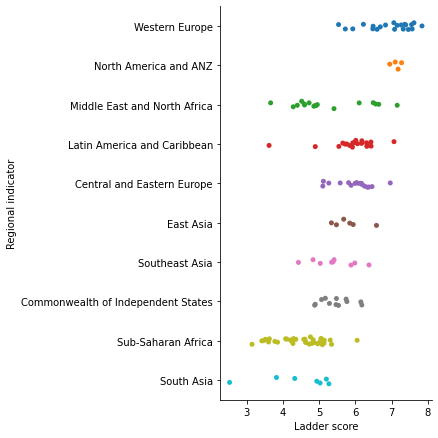

In [42]:
happy_by_country = sns.catplot(
    data=wh2021,
    y='Regional indicator', x="Ladder score",
    ci=None, orient='h', height=6
)

In [43]:
#Jackson's Section Start

In [44]:
wh2021_j = wh2021.drop(columns=['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'])
wh2021_j['year'] = 2021
wh2021_j = wh2021_j[wh2021_j['Country name'].isin(wh[wh['year']==2020]['Country name'].unique())]
wh2021_j = wh2021_j.rename(columns={'Ladder score': 'Life Ladder', 'Logged GDP per capita': 'Log GDP per capita', 'Healthy life expectancy': 'Healthy life expectancy at birth'})
wh_j = wh.drop(columns=['Positive affect', 'Negative affect'])
wh_j = wh_j[wh_j['Country name'].isin(wh2021_j['Country name'].unique())]
wh_j=wh_j.append(wh2021_j) #Add a 2021 statistic for all the countries to help get data on pre-rona v post-rona

In [45]:
wh_j[wh_j['Country name'] == 'United States']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
1836,United States,2006,7.182,10.924,0.965,68.06,0.911,NaN,0.600
1837,United States,2007,7.513,10.933,NaN,68.22,0.872,0.197,0.633
1838,United States,2008,7.280,10.922,0.953,68.38,0.878,0.255,0.668
1839,United States,2009,7.158,10.888,0.912,68.54,0.831,0.201,0.665
1840,United States,2010,7.164,10.905,0.926,68.70,0.828,0.244,0.690
1841,United States,2011,7.115,10.913,0.922,68.68,0.863,0.161,0.697
1842,United States,2012,7.026,10.928,0.903,68.66,0.823,0.215,0.710
1843,United States,2013,7.249,10.939,0.925,68.64,0.792,0.274,0.747
1844,United States,2014,7.151,10.956,0.902,68.62,0.866,0.221,0.702
1845,United States,2015,6.864,10.977,0.904,68.60,0.849,0.219,0.698


In [46]:
def countrySelector(country):
    return sns.scatterplot(data=wh_j[wh_j['Country name'] == country], x='year', y='Life Ladder')

interact(countrySelector, country='United States'); #widget to see various countries Ladder score's over years

interactive(children=(Text(value='United States', description='country'), Output()), _dom_classes=('widget-int…

In [47]:
wh_j_sorted=wh_j.sort_values(by='Country name')
rona_diff = []
summ = 0
for i in range(len(list(wh_j_sorted[wh_j_sorted['year']==2020]['Life Ladder']))):
        rona_diff.append((list(wh_j_sorted[wh_j_sorted['year']==2020]['Life Ladder'])[i] - list(wh_j_sorted[wh_j_sorted['year']==2021]['Life Ladder'])[i]) * -1)
        summ+= rona_diff[i]
average_rona_diff = summ/len(wh_j_sorted[wh_j_sorted['year']==2020])
print('On average, the world\'s happiness changed by', average_rona_diff, 'Life Ladder score after the pandemic started')
differ = pd.DataFrame()
differ['Country name'] = wh_j_sorted[wh_j_sorted['year']==2020]['Country name']
differ['rona_diff'] = rona_diff
differ.reset_index(drop=True)
differ.sort_values(by='rona_diff').head(10) #countries made most unhappy by rona age

On average, the world's happiness changed by -0.001473684210526275 Life Ladder score after the pandemic started


,Country name,rona_diff
1933,Zambia,-0.765
1279,Nigeria,-0.744
422,Croatia,-0.626
944,Kyrgyzstan,-0.506
356,China,-0.432
746,India,-0.406
1807,Ukraine,-0.395
1150,Mongolia,-0.334
244,Bulgaria,-0.332
550,Ethiopia,-0.274


In [48]:
differ.sort_values(by='rona_diff', ascending=False).head(10) #countries that gained happiness from rona era

,Country name,rona_diff
1394,Philippines,0.800
174,Benin,0.637
527,El Salvador,0.599
117,Bahrain,0.474
277,Cambodia,0.453
1087,Malta,0.445
497,Ecuador,0.410
482,Dominican Republic,0.377
1122,Mexico,0.353
1893,Venezuela,0.318


In [49]:
#can these be explained by the coronavirus impact in these countries
le_rona = pd.read_csv('data/owid-covid-data.csv')
le_rona = le_rona[le_rona['continent'].notna()]
le_rona = le_rona[le_rona['date']=='7/12/2021'][['location', 'total_cases', 'total_deaths']]
le_rona = le_rona.reset_index(drop=True)
le_rona['deaths per case'] = le_rona['total_deaths'] / le_rona['total_cases']
le_rona = le_rona[le_rona['location'].isin(differ['Country name'])]
le_rona = le_rona.rename(columns={'location': 'Country name'})
rona_differ = pd.merge(differ, le_rona, on='Country name')

In [50]:
px.scatter(rona_differ, y='rona_diff', x='deaths per case', color='total_deaths', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Happiness',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'rona_diff': 'Happiness Change After Pandemic'}, hover_name='Country name')

NameError: name 'px' is not defined

In [51]:
px.scatter(rona_differ, y='rona_diff', x='total_deaths', color='deaths per case', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Happiness',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'rona_diff': 'Happiness Change After Pandemic'}, hover_name='Country name')

NameError: name 'px' is not defined

In [52]:
#Still need to style and add some markdown to make the narrative clear

In [53]:
#Jackson's Section End 

In [54]:
#Ahmad's section

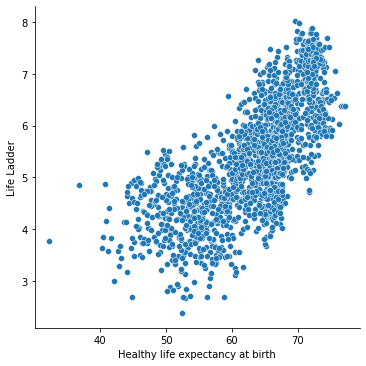

In [55]:
ax = sns.relplot(x="Healthy life expectancy at birth", y="Life Ladder", data=wh, size_order="Reigional indicator", kind="scatter")

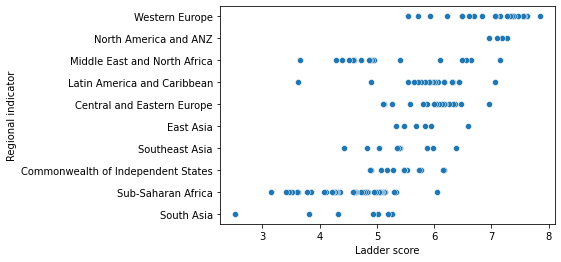

In [56]:
fg = sns.scatterplot(x="Ladder score", y="Regional indicator", data=wh2021,
            )

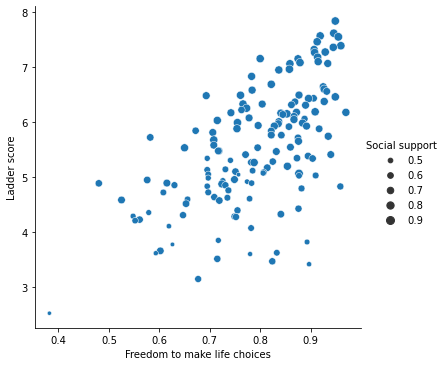

In [57]:
fg = sns.relplot(x="Freedom to make life choices", y="Ladder score", data=wh2021, kind="scatter", size="Social support")

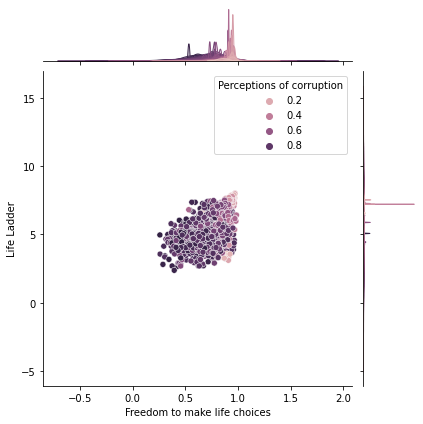

In [58]:
sns.jointplot("Freedom to make life choices", "Life Ladder", hue="Perceptions of corruption", data=wh)

In [59]:
wh.loc[wh['Life Ladder'] == 2.3750000]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
11,Afghanistan,2019,2.375,7.697,0.42,52.4,0.394,-0.108,0.924,0.351,0.502


In [60]:
wh.loc[wh['Life Ladder'] == 8.019000]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
449,Denmark,2005,8.019,10.851,0.972,69.6,0.971,NaN,0.237,0.86,0.154


<AxesSubplot:>

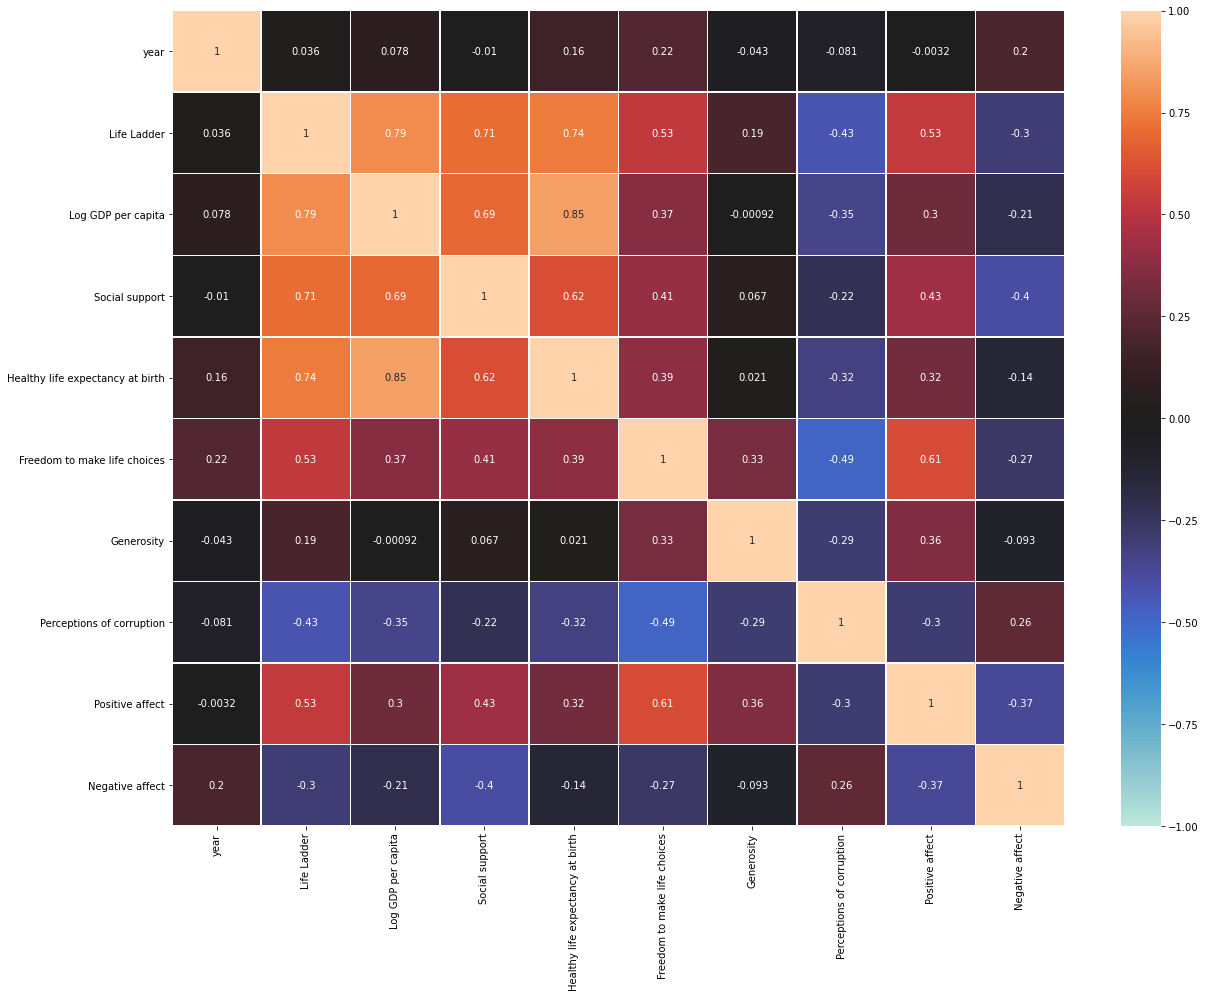

In [61]:
corr = wh.corr()
fig, ax = plt.subplots(figsize=(20,15)) # 
sns.heatmap(corr, 
            annot=True, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            ax=ax, 
            linewidths=.5, 
            vmin = -1, vmax=1, center=0
           )